In [1]:
library("tidyverse")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
library("ggplot2")
#install.packages("DT")
library("DT")

Warning message:
"package 'DT' was built under R version 3.6.3"

In [23]:
cases <- read_csv("COVID-19_cases_plus_census.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  county_fips_code = col_character(),
  county_name = col_character(),
  state = col_character(),
  state_fips_code = col_character(),
  date = col_date(format = ""),
  geo_id = col_character(),
  pop_5_years_over = col_logical(),
  speak_only_english_at_home = col_logical(),
  speak_spanish_at_home = col_logical(),
  speak_spanish_at_home_low_english = col_logical(),
  pop_15_and_over = col_logical(),
  pop_never_married = col_logical(),
  pop_now_married = col_logical(),
  pop_separated = col_logical(),
  pop_widowed = col_logical(),
  pop_divorced = col_logical()
)
See spec(...) for full column specifications.


In [24]:
cases

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths,geo_id,nonfamily_households,family_households,...,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
50009,Essex County,VT,50,2021-01-19,111,0,50009,994,1726,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50007,Chittenden County,VT,50,2021-01-19,3636,78,50007,27549,37357,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
10001,Kent County,DE,10,2021-01-19,11548,187,10001,19148,44233,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
44009,Washington County,RI,44,2021-01-19,5521,122,44009,16912,32696,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
33001,Belknap County,NH,33,2021-01-19,2496,79,33001,8260,16319,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
44005,Newport County,RI,44,2021-01-19,3578,6,44005,13438,21983,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50015,Lamoille County,VT,50,2021-01-19,312,1,50015,4086,6315,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
09013,Tolland County,CT,09,2021-01-19,6255,125,09013,19146,35732,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50001,Addison County,VT,50,2021-01-19,527,5,50001,5283,9418,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50005,Caledonia County,VT,50,2021-01-19,307,4,50005,4763,7331,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017


In [61]:
cases <- cases %>% mutate_if(is.character, factor)
dim(cases)

[1] 3142  259

In [62]:
cases_CA <- cases %>% filter(state == "CA")
dim(cases_CA)

[1]  58 259

In [63]:
summary(cases_CA)

 county_fips_code           county_name     state    state_fips_code
 06001  : 1       Alameda County  : 1   CA     :58   06     :58     
 06003  : 1       Alpine County   : 1   AK     : 0   01     : 0     
 06005  : 1       Amador County   : 1   AL     : 0   02     : 0     
 06007  : 1       Butte County    : 1   AR     : 0   04     : 0     
 06009  : 1       Calaveras County: 1   AZ     : 0   05     : 0     
 06011  : 1       Colusa County   : 1   CO     : 0   08     : 0     
 (Other):52       (Other)         :52   (Other): 0   (Other): 0     
      date            confirmed_cases       deaths            geo_id  
 Min.   :2021-01-19   Min.   :     40   Min.   :    0.0   06001  : 1  
 1st Qu.:2021-01-19   1st Qu.:   2673   1st Qu.:   27.5   06003  : 1  
 Median :2021-01-19   Median :  11114   Median :  119.0   06005  : 1  
 Mean   :2021-01-19   Mean   :  51668   Mean   :  581.7   06007  : 1  
 3rd Qu.:2021-01-19   3rd Qu.:  39784   3rd Qu.:  440.5   06009  : 1  
 Max.   :2021-01-19   

In [64]:
cases_CA_race <- cases_CA %>% 
  filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name, confirmed_cases, deaths, total_pop, white_pop, black_pop,asian_pop,hispanic_pop,amerindian_pop,median_age)
cases_CA_race <- cases_CA_race %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
#     male_per_1000 = male_pop/total_pop*1000,
#     female_per_1000 = female_pop/total_pop*1000,
    black_per_1000 = black_pop/total_pop*1000,
    white_per_1000 = white_pop/total_pop*1000,
    asian_per_1000 = asian_pop/total_pop*1000,
    hispanic_per_1000 = hispanic_pop/total_pop*1000,
    amerindian_per_1000 = amerindian_pop/total_pop*1000
)

cases_CA_economic <- cases_CA %>% 
  filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name, confirmed_cases, deaths, total_pop, male_pop, female_pop, median_income, income_per_capita, median_rent, poverty, commuters_by_public_transportation )
cases_CA_economic <- cases_CA_economic %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
)

cases_CA <- cases_CA %>% 
  filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name, confirmed_cases, deaths, total_pop, male_pop, female_pop, white_pop, black_pop,asian_pop,hispanic_pop,amerindian_pop, median_income, median_age, poverty, commuters_by_public_transportation )
cases_CA <- cases_CA %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
    male_per_1000 = male_pop/total_pop*1000,
    female_per_1000 = female_pop/total_pop*1000,
    black_per_1000 = black_pop/total_pop*1000,
    white_per_1000 = white_pop/total_pop*1000,
    asian_per_1000 = asian_pop/total_pop*1000,
    hispanic_per_1000 = hispanic_pop/total_pop*1000,
    amerindian_per_1000 = amerindian_pop/total_pop*1000
)
summary(cases_CA_economic)

              county_name confirmed_cases       deaths       
 Alameda County     : 1   Min.   :    260   Min.   :    2.0  
 Amador County      : 1   1st Qu.:   2992   1st Qu.:   29.0  
 Butte County       : 1   Median :  11952   Median :  125.5  
 Calaveras County   : 1   Mean   :  53512   Mean   :  602.5  
 Colusa County      : 1   3rd Qu.:  41500   3rd Qu.:  453.2  
 Contra Costa County: 1   Max.   :1002614   Max.   :13936.0  
 (Other)            :50                                      
   total_pop           male_pop         female_pop      median_income   
 Min.   :    9017   Min.   :   4659   Min.   :   4358   Min.   : 36563  
 1st Qu.:   57478   1st Qu.:  28913   1st Qu.:  28565   1st Qu.: 47972  
 Median :  198810   Median :  97960   Median : 100850   Median : 56819  
 Mean   :  696049   Mean   : 345793   Mean   : 350256   Mean   : 61305  
 3rd Qu.:  733977   3rd Qu.: 364222   3rd Qu.: 369756   3rd Qu.: 72064  
 Max.   :10105722   Max.   :4979641   Max.   :5126081   Max.   :10

In [65]:
datatable(cases_CA_race) %>% formatRound(c(5, 9, 10), 2) %>% formatPercentage(11, 2)

HTML widgets cannot be represented in plain text (need html)

In [66]:
datatable(cases_CA_economic) %>% formatRound(c(5, 9, 10), 2) %>% formatPercentage(11, 2)

HTML widgets cannot be represented in plain text (need html)

In [67]:
counties <- map_data("county") %>% as_tibble()
counties_CA <- counties %>% 
  filter(region == "california") %>% 
  rename(county = subregion)

In [68]:
cases_CA <- cases_CA %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_CA_clust <- counties_CA %>% left_join(cases_CA)

Joining, by = "county"


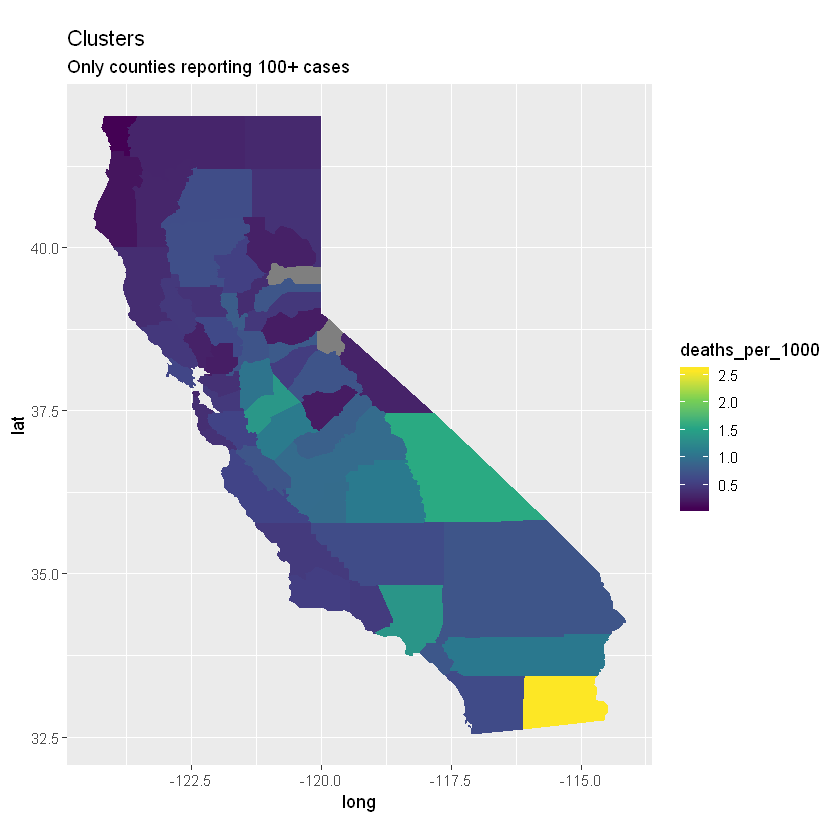

In [69]:

ggplot(counties_CA_clust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = deaths_per_1000)) +
  coord_quickmap() +
  scale_fill_continuous(type = "viridis") +
  labs(title = "Clusters", subtitle = "Only counties reporting 100+ cases")

In [70]:
cases_CA_race_scaled <- cases_CA_race %>% 
  select(
    median_age,
#     male_pop, 
#     female_pop, 
    white_pop, 
    black_pop,
    asian_pop,
    hispanic_pop,
    amerindian_pop,
   # total_pop, # you should use density
    
  ) %>% 
  scale() %>% as_tibble()

cases_CA_economic_scaled <- cases_CA_economic %>% 
  select(
    male_pop, 
    female_pop, 
    median_income, 
    income_per_capita, 
    median_rent, 
    poverty, 
    commuters_by_public_transportation 
   # total_pop, # you should use density
    
  ) %>% 
  scale() %>% as_tibble()

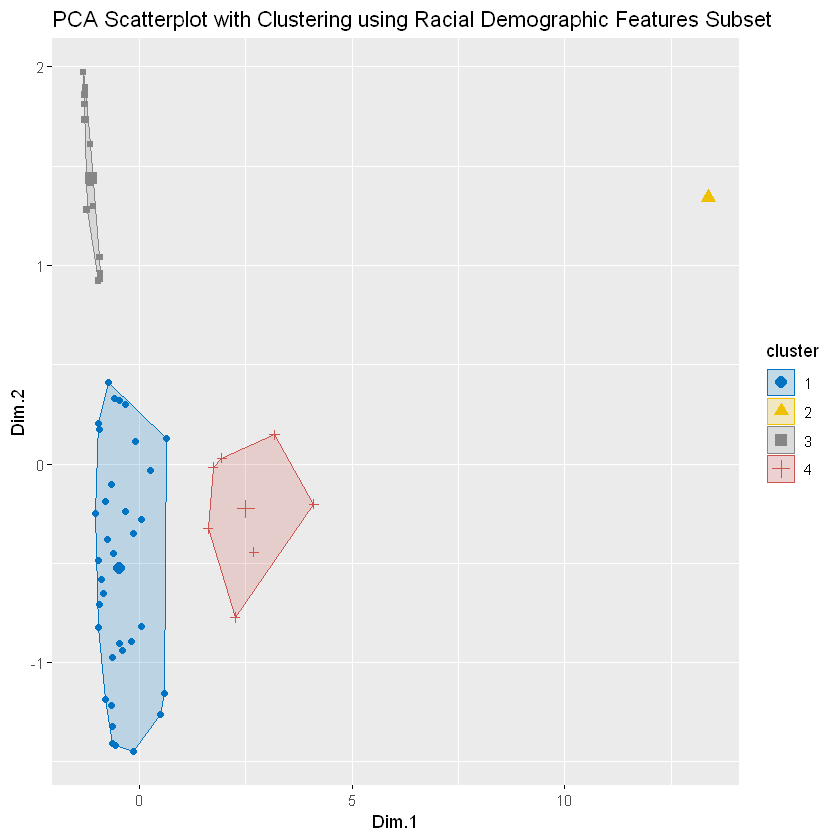

In [71]:
# Load the necessary library for PCA and clustering
library("FactoMineR")
library("factoextra")

# Create a matrix with only the numerical variables
num_data <- cases_CA_race_scaled[, sapply(cases_CA_race_scaled, is.numeric)]

# Perform PCA on the numerical data
pca <- PCA(num_data, graph = FALSE)

# Get the coordinates of each observation in the new 2-dimensional space
coords <- as.data.frame(pca$ind$coord[, 1:2])

# Perform k-means clustering on the coordinates
k <- 4 # set the number of clusters to 3
set.seed(123) # set the random seed for reproducibility
kmeans_res <- kmeans(coords, k)

# Plot the coordinates on a scatterplot, colored by cluster
fviz_cluster(kmeans_res, geom = "point", data = coords, stand = FALSE,
             ellipse.type = "convex", ellipse.level = 0.95, palette = "jco",
             main = "PCA Scatterplot with Clustering using Racial Demographic Features Subset")

# Add axis labels
# xlabel <- paste("PC1 (", round(pca$eig[1,2]*100,2), "%)", sep = "")
# ylabel <- paste("PC2 (", round(pca$eig[2,2]*100,2), "%)", sep = "")
# xlabel <- sub(" ", "", xlabel) # remove spaces
# ylabel <- sub(" ", "", ylabel) # remove spaces
# xlabel <- sub("\\(|\\)", "", xlabel) # remove parentheses
# ylabel <- sub("\\(|\\)", "", ylabel) # remove parentheses
# xlabel <- sub("%", "%%", xlabel) # escape the percent sign
# ylabel <- sub("%", "%%", ylabel) # escape the percent sign
# xlabel <- expression(paste(xlabel)) # use expression to render the text as mathematical notation
# ylabel <- expression(paste(ylabel)) # use expression to render the text as mathematical notation
# xlabel(xlabel)
# ylabel(ylabel)

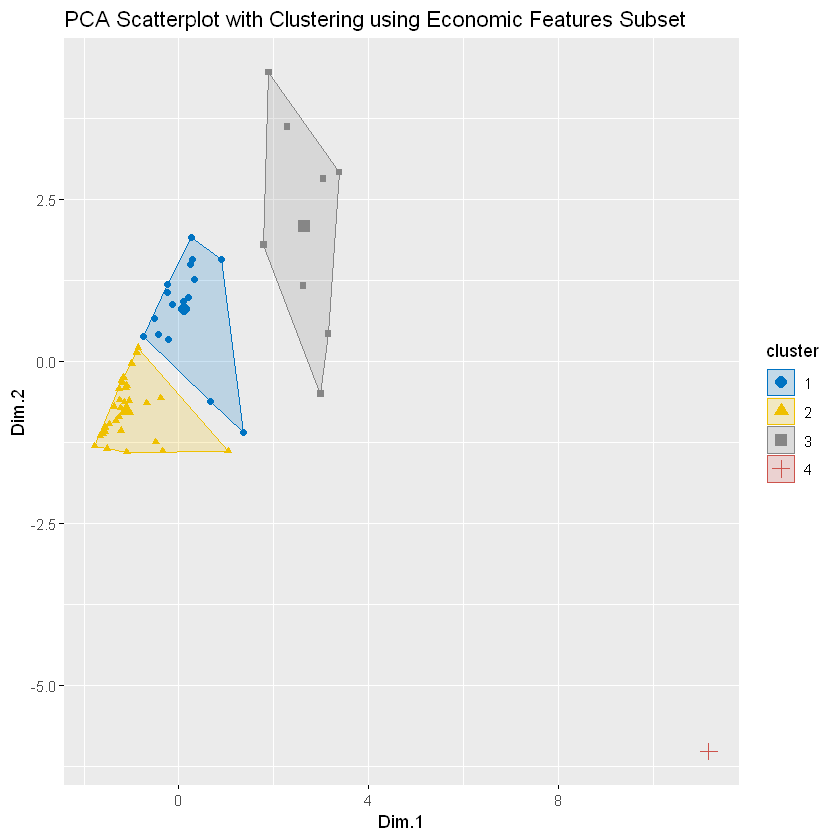

In [72]:
# Load the necessary library for PCA and clustering
library("FactoMineR")
library("factoextra")

# Create a matrix with only the numerical variables
num_data <- cases_CA_economic_scaled[, sapply(cases_CA_economic_scaled, is.numeric)]

# Perform PCA on the numerical data
pca <- PCA(num_data, graph = FALSE)

# Get the coordinates of each observation in the new 2-dimensional space
coords <- as.data.frame(pca$ind$coord[, 1:2])

# Perform k-means clustering on the coordinates
k <- 4 # set the number of clusters to 3
set.seed(123) # set the random seed for reproducibility
kmeans_res <- kmeans(coords, k)

# Plot the coordinates on a scatterplot, colored by cluster
fviz_cluster(kmeans_res, geom = "point", data = coords, stand = FALSE,
             ellipse.type = "convex", ellipse.level = 0.95, palette = "jco",
             main = "PCA Scatterplot with Clustering using Economic Features Subset")

# Add axis labels
# xlabel <- paste("PC1 (", round(pca$eig[1,2]*100,2), "%)", sep = "")
# ylabel <- paste("PC2 (", round(pca$eig[2,2]*100,2), "%)", sep = "")
# xlabel <- sub(" ", "", xlabel) # remove spaces
# ylabel <- sub(" ", "", ylabel) # remove spaces
# xlabel <- sub("\\(|\\)", "", xlabel) # remove parentheses
# ylabel <- sub("\\(|\\)", "", ylabel) # remove parentheses
# xlabel <- sub("%", "%%", xlabel) # escape the percent sign
# ylabel <- sub("%", "%%", ylabel) # escape the percent sign
# xlabel <- expression(paste(xlabel)) # use expression to render the text as mathematical notation
# ylabel <- expression(paste(ylabel)) # use expression to render the text as mathematical notation
# xlabel(xlabel)
# ylabel(ylabel)

In [73]:
km_race <- kmeans(cases_CA_race_scaled, centers = 5)

km_economic <- kmeans(cases_CA_economic_scaled, centers = 5)
km_race

K-means clustering with 5 clusters of sizes 1, 13, 7, 17, 18

Cluster means:
   median_age  white_pop  black_pop  asian_pop hispanic_pop amerindian_pop
1 -0.50047841  5.4001901  6.7190942  5.7344522    6.6702642      5.1998353
2  1.55980367 -0.4759445 -0.3324317 -0.4039517   -0.3760777     -0.4927103
3 -0.52354193  1.3752572  0.7653067  1.1945905    0.7689840      1.3378113
4  0.04368502 -0.1580249 -0.2066154 -0.1869257   -0.2555759     -0.1631995
5 -0.93637896 -0.3418494 -0.2356760 -0.3148599   -0.1566307     -0.2991605

Clustering vector:
 [1] 1 3 3 3 3 3 5 3 5 3 4 5 4 5 5 5 4 4 4 5 5 4 5 5 4 4 5 4 2 5 4 4 2 5 4 5 5 5
[39] 4 2 2 2 4 2 4 5 2 5 2 4 2 4 2 2 2 2

Within cluster sum of squares by cluster:
[1]  0.000000  2.522667 17.554671  9.524630  6.321079
 (between_SS / total_SS =  89.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [74]:
counties <- as_tibble(map_data("county"))
counties_CA <- counties %>%
  filter(region == "california") %>%
  rename(county = subregion)

In [75]:
cases_CA_race <- cases_CA_race %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_CA_clust_race <- counties_CA %>% left_join(cases_CA_race %>% 
    add_column(cluster = factor(km_race$cluster)))

cases_CA_economic <- cases_CA_economic %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_CA_clust_economic <- counties_CA %>% left_join(cases_CA_economic %>% 
    add_column(cluster = factor(km_economic$cluster)))

Joining, by = "county"
Joining, by = "county"


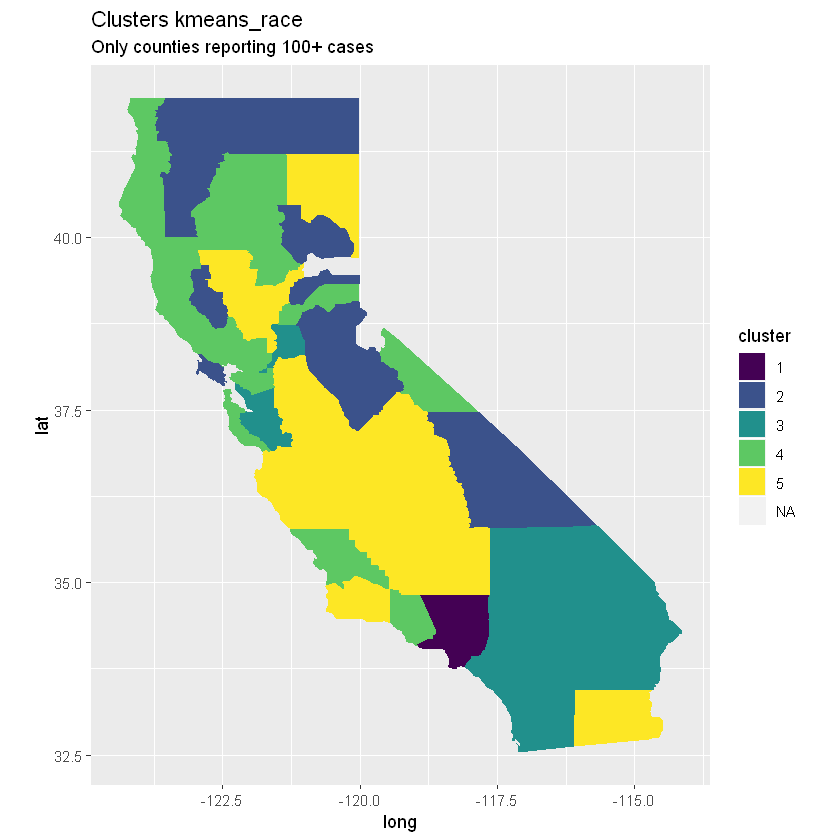

In [76]:
ggplot(counties_CA_clust_race, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters kmeans_race", subtitle = "Only counties reporting 100+ cases")

In [59]:
labels <- km_race$cluster
labels

[1] 2 4 4 4 4 4 5 4 5 4 1 5 1 5 5 5 1 1 1 5 5 1 5 5 1 1 5 1 3 5 1 1 3 5 1 5 5 5
[39] 1 3 3 3 1 3 1 5 3 5 3 1 3 1 3 3 3 3

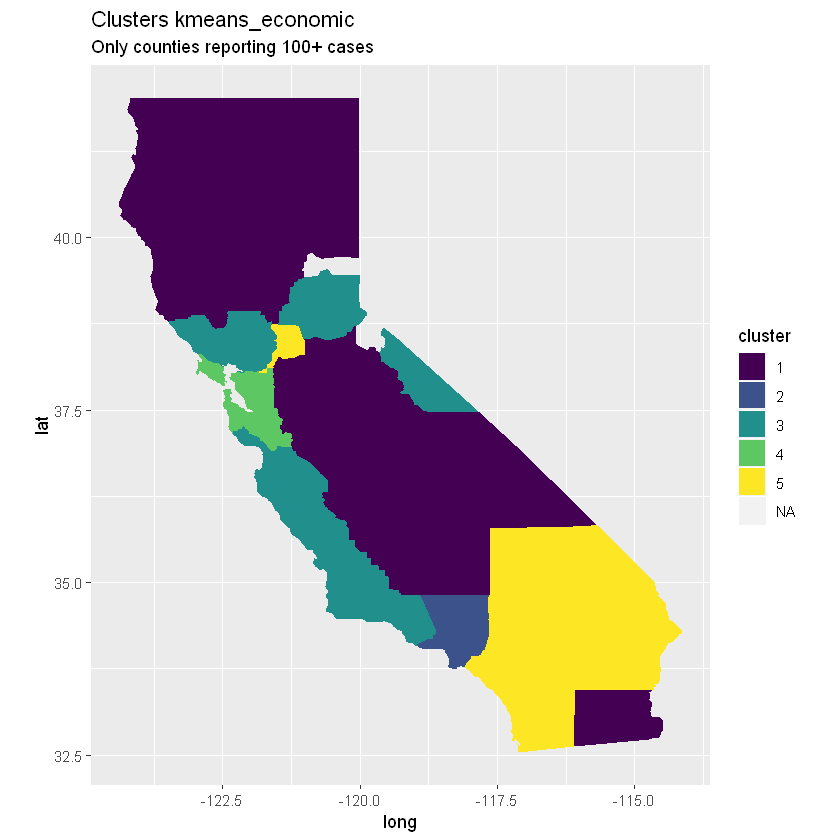

In [42]:
ggplot(counties_CA_clust_economic, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters kmeans_economic", subtitle = "Only counties reporting 100+ cases")

In [43]:
# cases_CA_race_km <- cases_CA_race %>% add_column(cluster = factor(km$cluster))

# cases_CA_km %>% group_by(cluster) %>% summarize(
#   avg_cases = mean(cases_per_1000), 
#   avg_deaths = mean(deaths_per_1000))

In [44]:
# ggplot(counties_CA_clust_economic, aes(long, lat)) + 
#   geom_polygon(aes(group = group, fill = cluster)) +
#   coord_quickmap() + 
#   scale_fill_viridis_d() + 
#   labs(title = "Clusters", subtitle = "Only counties reporting 100+ cases")

Joining, by = "county"


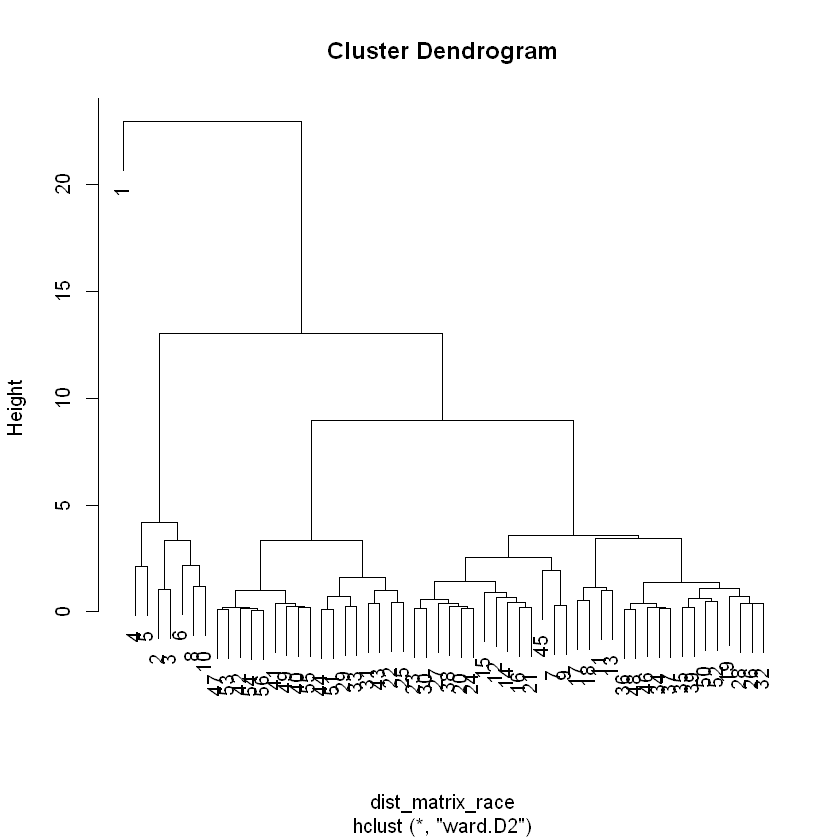

In [45]:
# Compute the distance matrix
dist_matrix_race <- dist(cases_CA_race_scaled)
# Perform hierarchical clustering
hc_race <- hclust(dist_matrix_race, method="ward.D2")
# Plot the dendrogram
#plot(hc)
# Get clusters
clusters_race <- cutree(hc_race, k = 5)
cluster_complete_race <- cases_CA_race_scaled %>%
  add_column(cluster = factor(clusters_race))
# Modify to graph
cases_CA_race_hc <- cases_CA_race %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))
counties_CA_clust_race_hc <- counties_CA %>% left_join(cases_CA_race %>% 
    add_column(cluster = factor(cluster_complete_race$cluster)))
plot(hc_race)

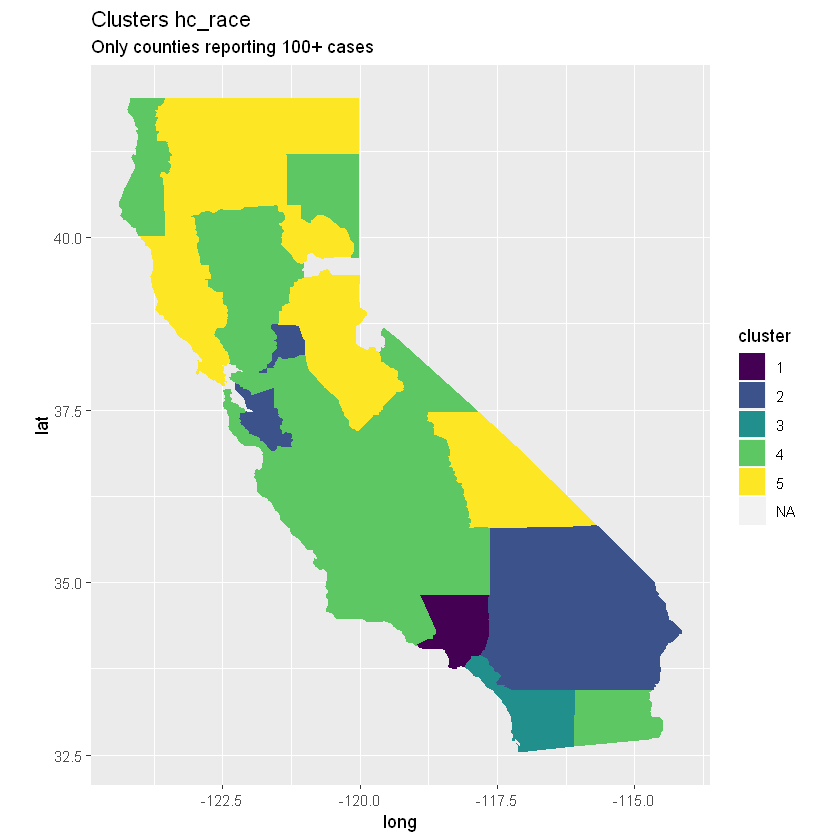

In [46]:
ggplot(counties_CA_clust_race_hc, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters hc_race", subtitle = "Only counties reporting 100+ cases")

Joining, by = "county"


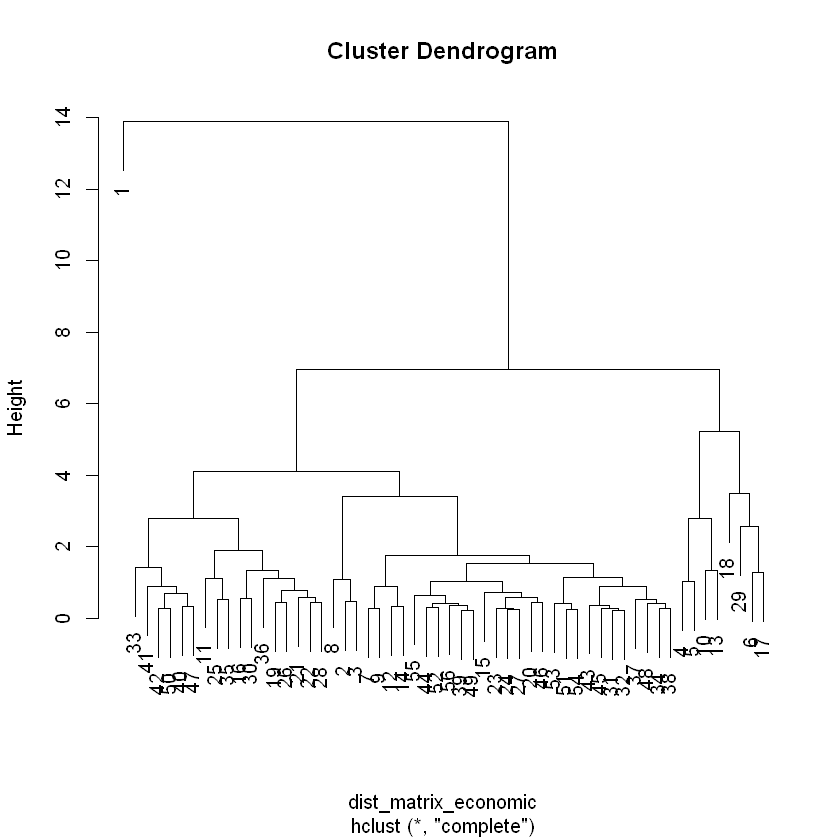

In [47]:
# Compute the distance matrix
dist_matrix_economic <- dist(cases_CA_economic_scaled)
# Perform hierarchical clustering
hc_economic <- hclust(dist_matrix_economic)
# Plot the dendrogram
#plot(hc)
# Get clusters
clusters_economic <- cutree(hc_economic, k = 5)
cluster_complete_economic <- cases_CA_economic_scaled %>%
  add_column(cluster = factor(clusters_economic))
# Modify to graph
cases_CA_economic_hc <- cases_CA_economic %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))
counties_CA_clust_economic_hc <- counties_CA %>% left_join(cases_CA_economic %>% 
    add_column(cluster = factor(cluster_complete_economic$cluster)))
plot(hc_economic)

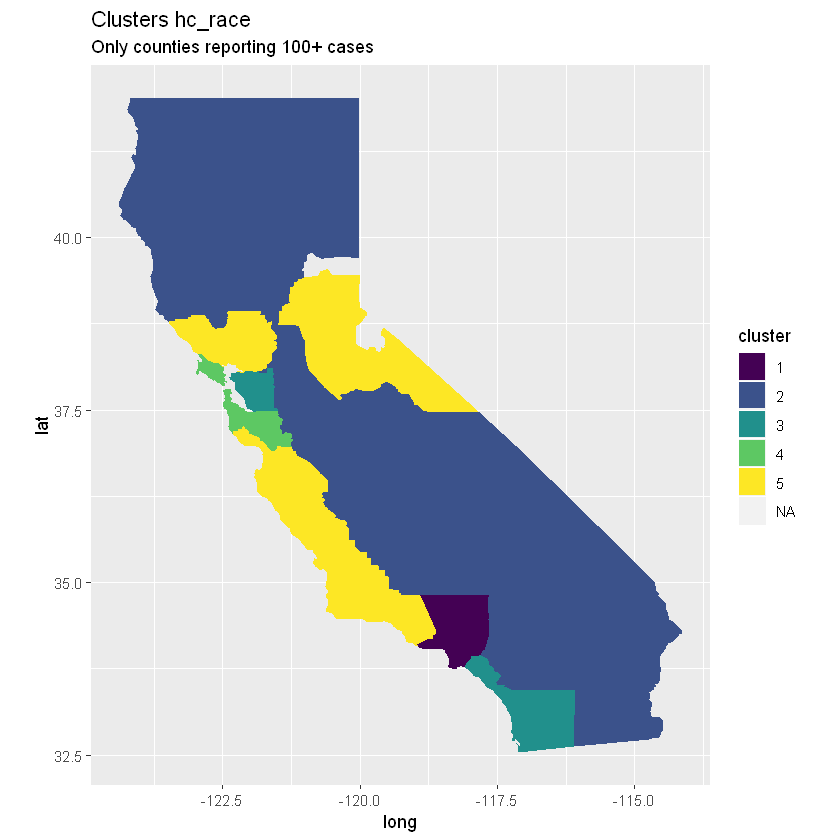

In [48]:
ggplot(counties_CA_clust_economic_hc, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters hc_race", subtitle = "Only counties reporting 100+ cases")